In [26]:
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
import seaborn as sns   # for data visualisation
import matplotlib.pyplot as plt   #for plotting graph
%matplotlib inline 
#matplotlib inline ensures command in cells bellow the cell that outputs a plot does not affect the plot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings   # to ignore warnings

#import all libraries and modules at the beginning of the code

DATA UNDERSTANDING

In [27]:
# loading the data
bestsellers = pd.read_csv("bestsellers.csv")
#previewing the train data
# .head() returns the first 10 rows in the dataframe
bestsellers.head(10) 

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [28]:
# the info() function is used to print a concise summary of a dataframe
bestsellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


DATA CLEANING

In [30]:
# checking to see if any feature has a empty or missing values

bestsellers.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [4]:
bestsellers.Genre.value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [5]:
#percentage of fiction to non fiction
bestsellers.Genre.value_counts()/len(bestsellers)

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

In [6]:
#this is used to view basic statistical details like percentile, mean, std e.tc.
bestsellers.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


DATA VISUALISATION

In [7]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

bestsellers_new =bestsellers.copy()

bestsellers_new['Genre']= le.fit_transform(bestsellers_new['Genre'])
bestsellers_new['Genre'].unique()

array([1, 0])

(array([310.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 240.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

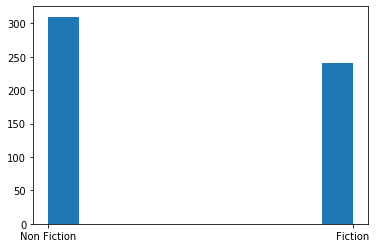

In [8]:
plt.hist(bestsellers['Genre'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014DDB854688>,
      dtype=object)

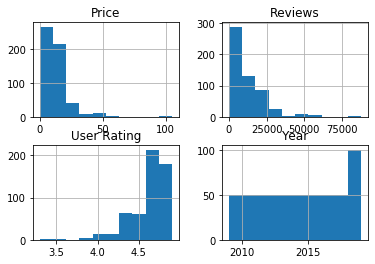

In [9]:
bestsellers.hist()

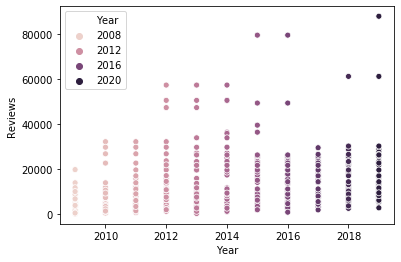

In [10]:
sns.scatterplot(x= 'Year', y= 'Reviews', data=bestsellers, hue='Year')
#This should show me the relationship btw Reviews and year

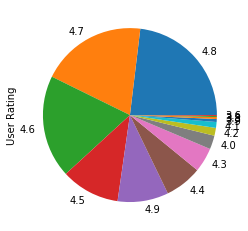

In [11]:
y = bestsellers['User Rating'].value_counts()
y.plot(kind='pie')


In [12]:
Author = bestsellers['Author'].value_counts()
name_of_author = []
times_of_author = []
for i in range(len(Author)):
    name_of_author.append(Author.keys()[i])
    times_of_author.append(Author[i])

In [13]:
bestsellers[['User Rating', 'Author', 'Name']].groupby(by=['Author','Name']).mean().sort_values(by=
                                                                ['User Rating'],ascending=False).head(10)

,,User Rating
Author,Name,
J. K. Rowling,"Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)",4.9
Dav Pilkey,Dog Man: A Tale of Two Kitties: From the Creator of Captain Underpants (Dog Man #3),4.9
J.K. Rowling,"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",4.9
Brandon Stanton,Humans of New York : Stories,4.9
J.K. Rowling,"Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)",4.9
Bill Martin Jr.,"Brown Bear, Brown Bear, What Do You See?",4.9
Emily Winfield Martin,The Wonderful Things You Will Be,4.9
J.K. Rowling,"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",4.9
Rush Limbaugh,Rush Revere and the Brave Pilgrims: Time-Travel Adventures with Exceptional Americans (1),4.9


In [14]:
bestsellers[['Name','User Rating','Year']].groupby(by=['Name']).mean().sort_values(by=
                                                                ['User Rating'],ascending=False).head(10)

,User Rating,Year
Name,,
Hamilton: The Revolution,4.9,2016.0
Rush Revere and the First Patriots: Time-Travel Adventures With Exceptional Americans (2),4.9,2014.0
"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",4.9,2016.0
"Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)",4.9,2017.0
"Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)",4.9,2019.0
"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",4.9,2016.0
Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6),4.9,2018.5
"Brown Bear, Brown Bear, What Do You See?",4.9,2018.0
Rush Revere and the Brave Pilgrims: Time-Travel Adventures with Exceptional Americans (1),4.9,2013.0


In [15]:
bestsellers['Name_length']=bestsellers['Name'].str.len()

C:\Users\OLADEJI\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\OLADEJI\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


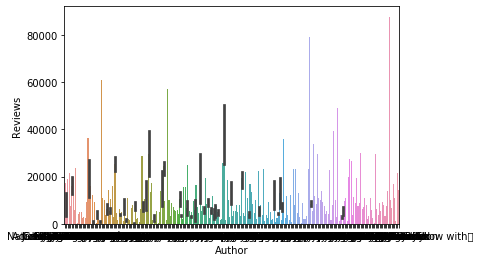

In [16]:
import seaborn as sns
sns.barplot(bestsellers.Author, bestsellers['Reviews'])

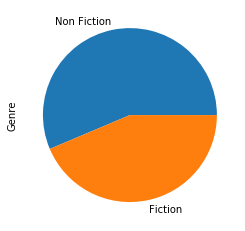

In [17]:
z = bestsellers['Genre'].value_counts()
z.plot(kind='pie')  
# pie chart showing the percentage of non fiction to fiction

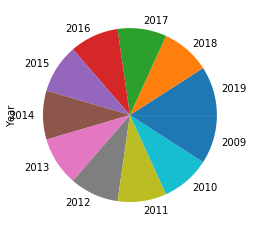

In [18]:
y = bestsellers['Year'].value_counts()
y.plot(kind='pie')

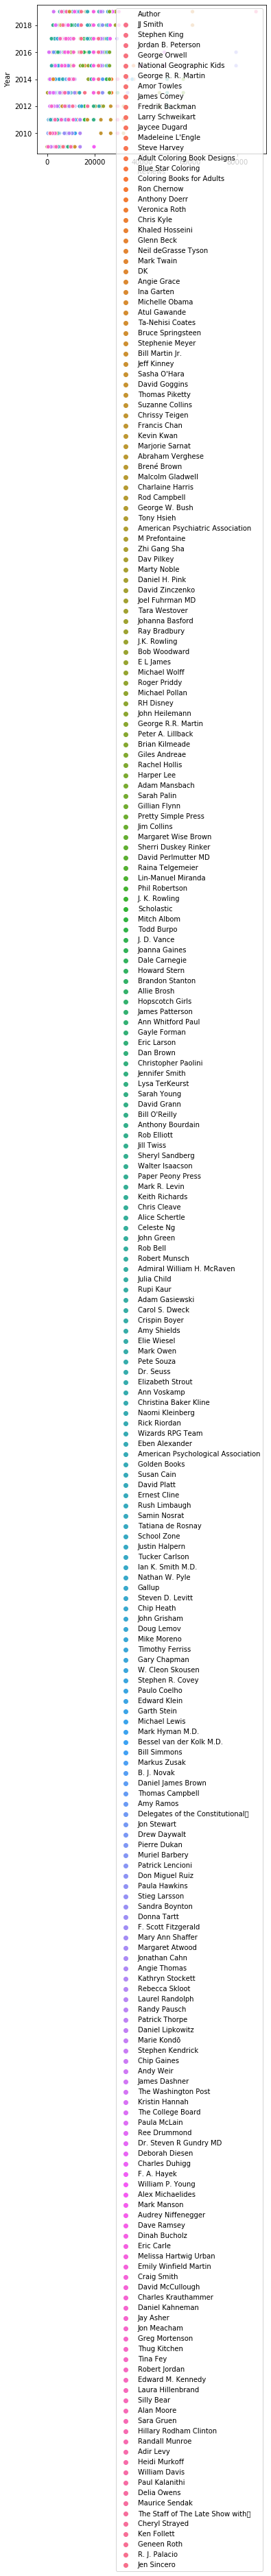

In [22]:
sns.scatterplot(x= 'Reviews', y= 'Year', data=bestsellers, hue='Author')

In [33]:
Author.head(10)

Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Dav Pilkey                             7
Stephen R. Covey                       7
Name: Author, dtype: int64

In [36]:
bestsellers['Reviews'].value_counts()

8580     10
5069      9
21834     8
19546     7
19576     6
         ..
3428      1
14982     1
9867      1
13964     1
2052      1
Name: Reviews, Length: 346, dtype: int64

In [37]:
bestsellers.groupby('Name').mean()

,User Rating,Reviews,Price,Year
Name,,,,
10-Day Green Smoothie Cleanse,4.7,17350.0,8.0,2016.0
11/22/63: A Novel,4.6,2052.0,22.0,2011.0
12 Rules for Life: An Antidote to Chaos,4.7,18979.0,15.0,2018.0
1984 (Signet Classics),4.7,21424.0,6.0,2017.0
"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",4.8,7665.0,12.0,2019.0
...,...,...,...,...
Winter of the World: Book Two of the Century Trilogy,4.5,10760.0,15.0,2012.0
Women Food and God: An Unexpected Path to Almost Everything,4.2,1302.0,11.0,2010.0
Wonder,4.8,21625.0,9.0,2015.0
